# Music-Genre-Classifier Data Collection

# 1. Import Dependencies 

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

import sys   
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import wave
import pylab
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Building Deep Neural Network for regression problem
import time 
import os

#for loading and visualizing audio files

import librosa
import librosa.display

#to play audio
import IPython.display as ipd

import soundfile as sf
from pygame import mixer
from scipy import signal
from scipy.io import wavfile


pygame 2.1.2 (SDL 2.0.18, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 2. Importing Data

# 3. Data Exploration

# 4. Data Augmentation

import IPython
IPython.display.Audio(r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genre_original\blues\blues.00000.au")

In [6]:

audio_fpath = r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\blues"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  100


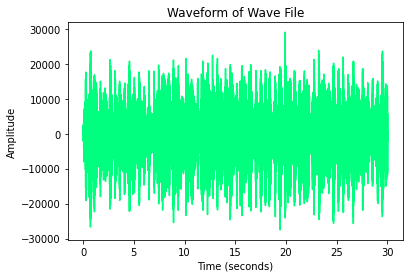

In [10]:
#run to play audio file
mixer.init()
#path to audio file
mixer.music.load(r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\blues\blues.00000.wav")
mixer.music.set_volume(.8)
mixer.music.play()

#to plot a graph
wav = wave.open(r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\blues\blues.00000.wav")

raw = wav.readframes(-1)
raw = np.frombuffer(raw, 'int16') 
sampleRate = wav.getframerate() 

if wav.getnchannels() == 2:
    print("Stereo files are not supporter. Use Mono files")
    sys.exit(0)

Time = np.linspace(0, len(raw)/sampleRate, num = len(raw))

plt.title("Waveform of Wave File")

plt.plot(Time, raw, color = "#00ff7f")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [11]:
#run to pause audio file
mixer.music.pause()

(array([-303, -386, -449, ...,  233,  184,  184], dtype=int16), 22050)

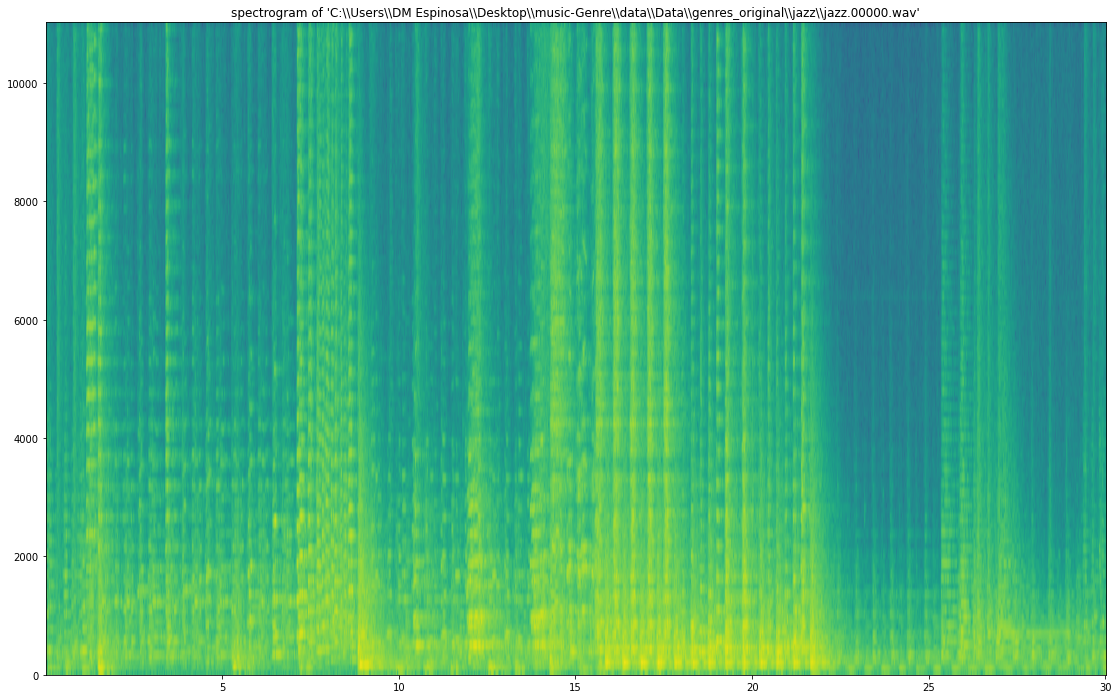

In [14]:

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
    return sound_info, frame_rate

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

graph_spectrogram(r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\jazz\jazz.00000.wav")
   


In [25]:
# step1 - converting a wav file to numpy array and then converting that to mel-spectrogram
my_audio_as_np_array, my_sample_rate= librosa.load(r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\jazz\jazz.00000.wav")

# step2 - converting audio np array to spectrogram
spec = librosa.feature.melspectrogram(y=my_audio_as_np_array,
                                        sr=my_sample_rate, 
                                            n_fft=2048, 
                                            hop_length=512, 
                                            win_length=None, 
                                            window='hann', 
                                            center=True, 
                                            pad_mode='reflect', 
                                            power=2.0,
                                     n_mels=128)
                                     
# step3 converting mel-spectrogram back to wav file
res = librosa.feature.inverse.mel_to_audio(spec, 
                                           sr=my_sample_rate, 
                                           n_fft=2048, 
                                           hop_length=512, 
                                           win_length=None, 
                                           window='hann', 
                                           center=True, 
                                           pad_mode='reflect', 
                                           power=2.0, 
                                           n_iter=32)



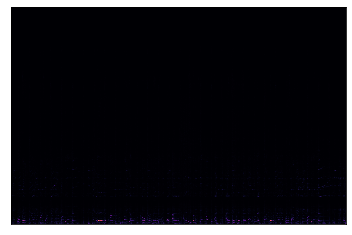

In [33]:
AUDIO_FILE = r"C:\Users\DM Espinosa\Desktop\music-Genre\data\Data\genres_original\blues\blues.00000.wav"
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)




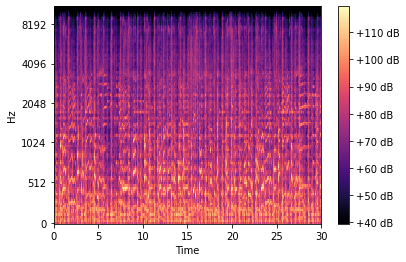

In [34]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')